In [4]:
# -*- coding: utf-8 -*-
"""
Test Quantum Process Tomography methods
"""

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg


# prepare channel
# p = 0.2
# channel = lambda rho: ch.depolarize_channel(rho, p)
channel = lambda rho: ch.gate_action(rho, 'X')
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'


# Number of qubit copies for each measurement axis
N_list = [100, 200, 500, 700, 1000, 1500, 2000, 5000, 7000]

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))/4


"""
How perfomance of LI method depends on number of copies of initial states
"""


# arrays of different distances for average values storage
tr_dist_val_av  = []

tr_dist_val_pr_av  = []

rep_numb = 50 # number of repetitions of experiment (for smooth results)


for i in range(rep_numb):
    C_est_list = []
    for n in N_list:

        # collect experimental data
        frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)/4

        # recover C_est
        C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
        C_est_LI = C_est_LI.reshape(4,4)
        C_est_list.append(C_est_LI)


    tr_dist_val = []

    tr_dist_val_pr = []

    for C in C_est_list:
#         fro_dist_val.append(LA.norm(C - C_true))
#         fro_dist_val_pr.append(LA.norm(tmg.CPTP_proj(C) - C_true))
#         hs_dist_val.append(tmg.hs_dist(C, C_true))
#         hs_dist_val_pr.append(tmg.hs_dist(tmg.CPTP_proj(C), C_true))
        tr_dist_val.append(tmg.tr_dist(C, C_true))
        tr_dist_val_pr.append(tmg.tr_dist(tmg.CPTP_proj(C), C_true))

#     fro_dist_val_av.append(fro_dist_val)
#     fro_dist_val_pr_av.append(fro_dist_val_pr)
#     hs_dist_val_av.append(hs_dist_val)
#     hs_dist_val_pr_av.append(hs_dist_val_pr)
    tr_dist_val_av.append(tr_dist_val)
    tr_dist_val_pr_av.append(tr_dist_val_pr)

# convert lists in arrays
tr_dist_val_av  = np.array(tr_dist_val_av)
# hs_dist_val_av  = np.array(hs_dist_val_av)
# fro_dist_val_av = np.array(fro_dist_val_av)

tr_dist_val_pr_av  = np.array(tr_dist_val_pr_av)
# tr_dist_val_pr_av  = np.array(tr_dist_val_pr_av)
# fro_dist_val_pr_av = np.array(fro_dist_val_pr_av)


# compute mean values for every array
tr_dist_val_av  = np.mean(tr_dist_val_av, axis = 0)
# hs_dist_val_av  = np.mean(hs_dist_val_av, axis = 0)
# fro_dist_val_av = np.mean(fro_dist_val_av, axis = 0)

tr_dist_val_pr_av = np.mean(tr_dist_val_pr_av,  axis=0)
# hs_dist_val_pr_av = np.mean(hs_dist_val_pr_av,  axis=0)
# fro_dist_val_pr_av = np.mean(fro_dist_val_pr_av, axis=0)




# # Plot the perfomance of Pseudo-Inverse matrix method (without projection on CPTP set)

# plt.figure(figsize=(8,6))
# plt.semilogx(N_list, tr_dist_val_av,  label= 'Trace distance',           marker='o')
# plt.semilogx(N_list, hs_dist_val_av,  label= 'Hilbert Schmidt distance', marker= '>')
# plt.semilogx(N_list, fro_dist_val_av, label= 'Frobenius norm',           marker='x')

# plt.xlabel('Number of copies')
# plt.ylabel('Error')
# plt.title('Perfomance of Pseudo-Inverse Matrix Method')
# plt.legend()
# plt.show()


#%%

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))/4

# arrays of different distances for average values storage
ml_tr_dist_val_av  = []
# ml_hs_dist_val_av  = []
# ml_fro_dist_val_av = []

ml_tr_dist_val_pr_av  = []
# ml_hs_dist_val_pr_av  = []
# ml_fro_dist_val_pr_av = []

C_0 = np.array([[1,0,0,1],
                [0,0,0,0],
                [0,0,0,0],
                [1,0,0,1]])

rep_numb = 10
for i in range(rep_numb):
    print('i = ', i)
    C_est_list = []
    for n in N_list:
        print('n =', n)

        # collect experimental data
        frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)/4

        # recover C_est
        C_est_ML = tmg.grad_descent(frequencies.reshape(-1,1), PROTOCOL, C_0)[-1]
        C_est_ML = C_est_ML.reshape(4,4)
        C_est_list.append(C_est_ML)


    # arrays of different distances
    ml_tr_dist_val = []
#     ml_hs_dist_val = []
#     ml_fro_dist_val = []

    ml_tr_dist_val_pr = []
#     ml_hs_dist_val_pr = []
#     ml_fro_dist_val_pr = []

    for C in C_est_list:
#         ml_fro_dist_val.append(LA.norm(C - C_true))
#         ml_fro_dist_val_pr.append(LA.norm(tmg.CPTP_proj(C) - C_true))
#         ml_hs_dist_val.append(tmg.hs_dist(C, C_true))
#         ml_hs_dist_val_pr.append(tmg.hs_dist(tmg.CPTP_proj(C), C_true))
        ml_tr_dist_val.append(tmg.tr_dist(C, C_true))
        ml_tr_dist_val_pr.append(tmg.tr_dist(tmg.CPTP_proj(C), C_true))

#     ml_fro_dist_val_av.append(ml_fro_dist_val)
#     ml_fro_dist_val_pr_av.append(ml_fro_dist_val_pr)
#     ml_hs_dist_val_av.append(ml_hs_dist_val)
#     ml_hs_dist_val_pr_av.append(ml_hs_dist_val_pr)
    ml_tr_dist_val_av.append(ml_tr_dist_val)
    ml_tr_dist_val_pr_av.append(ml_tr_dist_val_pr)

# convert lists in arrays
ml_tr_dist_val_av  = np.array(ml_tr_dist_val_av)
# ml_hs_dist_val_av  = np.array(ml_hs_dist_val_av)
# ml_fro_dist_val_av = np.array(ml_fro_dist_val_av)

ml_tr_dist_val_pr_av  = np.array(ml_tr_dist_val_pr_av)
# ml_tr_dist_val_pr_av  = np.array(ml_tr_dist_val_pr_av)
# ml_fro_dist_val_pr_av = np.array(ml_fro_dist_val_pr_av)


# compute mean values for every array
ml_tr_dist_val_av  = np.mean(ml_tr_dist_val_av, axis = 0)
# ml_hs_dist_val_av  = np.mean(ml_hs_dist_val_av, axis = 0)
# ml_fro_dist_val_av = np.mean(ml_fro_dist_val_av, axis = 0)

ml_tr_dist_val_pr_av  = np.mean(ml_tr_dist_val_pr_av,  axis=0)
# ml_hs_dist_val_pr_av  = np.mean(ml_hs_dist_val_pr_av,  axis=0)
# ml_fro_dist_val_pr_av = np.mean(ml_fro_dist_val_pr_av, axis=0)

i =  0
n = 100
End of algorithm. next_cost =  [[2.65922005]]
n = 200
End of algorithm. next_cost =  [[2.61253767]]
n = 500
n = 700
End of algorithm. next_cost =  [[2.62680791]]
n = 1000
End of algorithm. next_cost =  [[2.6544307]]
n = 1500
End of algorithm. next_cost =  [[2.6400374]]
n = 2000
End of algorithm. next_cost =  [[2.63492525]]
n = 5000
End of algorithm. next_cost =  [[2.63361469]]
n = 7000
End of algorithm. next_cost =  [[2.62581437]]
i =  1
n = 100
End of algorithm. next_cost =  [[2.63778903]]
n = 200
End of algorithm. next_cost =  [[2.64551154]]
n = 500
End of algorithm. next_cost =  [[2.64000936]]
n = 700
n = 1000
End of algorithm. next_cost =  [[2.62698525]]
n = 1500
End of algorithm. next_cost =  [[2.63403295]]
n = 2000
End of algorithm. next_cost =  [[2.631786]]
n = 5000
End of algorithm. next_cost =  [[2.62525945]]
n = 7000
End of algorithm. next_cost =  [[2.63167327]]
i =  2
n = 100
End of algorithm. next_cost =  [[2.64152781]]
n = 200
End of algorithm. next_cost =  

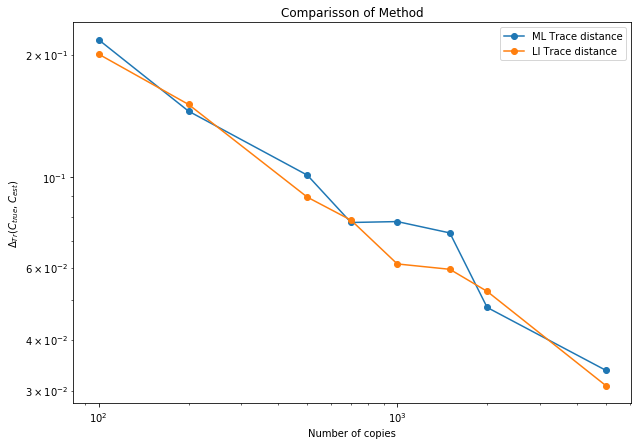

In [6]:
plt.figure(figsize=(10,7))
plt.xlabel('Number of copies')
plt.ylabel('$\Delta_{Tr}(C_{true}, C_{est})$')
plt.title('Comparisson of Method')
plt.loglog(N_list[:-1], ml_tr_dist_val_pr_av[:-1],  label= 'ML Trace distance',           marker='o')
plt.loglog(N_list[:-1], tr_dist_val_pr_av[:-1],  label= 'LI Trace distance',           marker='o')
plt.legend()

plt.savefig('method_comp_X_gate.pdf', format='pdf', dpi=1000)

plt.show()

In [6]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg

# prepare channel
p = 0.1
channel = lambda rho: ch.depolarize_channel(rho, p)
# channel = lambda rho: ch.gate_action(rho, 'X')
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))/4
n = 1000

# collect experimental data
frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)/n

In [7]:
# recover C_est via linear inversion
C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
C_est_LI = tmg.CPTP_proj(C_est_LI).reshape(4,4)


# recover C_est via gradient descend
C_list = tmg.grad_descent(frequencies.reshape(-1,1), PROTOCOL)
C_est_ML = C_list[-1]
C_est_ML = C_est_ML.reshape(4,4)

In [3]:
print('True channel:\n', np.around(C_true, decimals=3),   '\n')
print('LI recovery:\n',  np.around(C_est_LI, decimals=3), '\n')
print('ML recovery:\n',  np.around(C_est_ML, decimals=3), '\n')

print(tmg.tr_dist(C_true, C_est_LI))
print(tmg.tr_dist(C_true, C_est_ML))

True channel:
 [[0.933+0.j 0.   +0.j 0.   +0.j 0.867+0.j]
 [0.   +0.j 0.067+0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.067+0.j 0.   +0.j]
 [0.867+0.j 0.   +0.j 0.   +0.j 0.933+0.j]] 

LI recovery:
 [[ 0.502-0.j -0.   -0.j -0.   -0.j  0.003-0.j]
 [-0.   +0.j  0.498-0.j -0.   -0.j  0.   +0.j]
 [-0.   +0.j -0.   +0.j  0.498-0.j  0.   +0.j]
 [ 0.003+0.j  0.   -0.j  0.   -0.j  0.502-0.j]] 

ML recovery:
 [[ 0.918-0.j    -0.029-0.011j -0.008-0.02j   0.837-0.014j]
 [-0.029+0.011j  0.082+0.j    -0.001-0.037j  0.008+0.02j ]
 [-0.008+0.02j  -0.001+0.037j  0.092+0.j     0.034+0.009j]
 [ 0.837+0.014j  0.008-0.02j   0.034-0.009j  0.908-0.j   ]] 

1.2949890263250774
0.10475311035281831


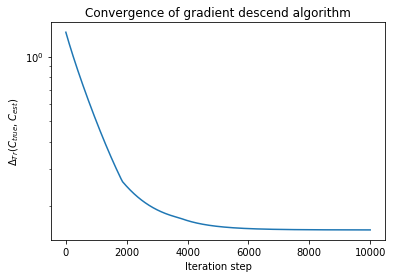

In [8]:
# conv = []
# for C in C_list:
#     conv.append(tmg.tr_dist(C_true, C))
fig = plt.subplots()    
plt.semilogy(conv)
plt.xlabel('Iteration step')
plt.ylabel('$\Delta_{Tr}(C_{true}, C_{est})$')
plt.title('Convergence of gradient descend algorithm')
plt.savefig('convergence_grad.pdf', format='pdf', dpi=1000)
plt.show()



In [21]:
conv_rel = []

for i in range(len(C_list) - 1):
    conv_rel.append(tmg.tr_dist(C_list[i+1], C_list[i]))

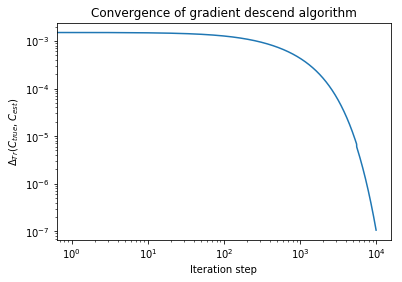

In [24]:
plt.loglog(conv_rel)
plt.xlabel('Iteration step')
plt.ylabel('$\Delta_{Tr}(C_{true}, C_{est})$')
plt.title('Convergence of gradient descend algorithm')
plt.show()

In [19]:
conv_rel

[]